# FIFA DATASET

#### importing dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv and getting top 10 elements from the Dataset
original_df=pd.read_csv("fifa.csv")
original_df.head()


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
#getting info about the Dataframe
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [4]:
#getting the statistical description of the numerical columns from the  data 
original_df.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [5]:
#Removing Unnessary columns
#we dont need the Photo of the Player ,Flag and club we are dropping these columns from the dataframe
original_df.drop(labels=["Photo","Flag","Club Logo"],axis=1,inplace=True)

In [6]:
#Changing the Names of the Columns Preventing from later ambiguiy
# changing the Datatype to Object Format
original_df["Release_clause"]=original_df["Release Clause"]
original_df.drop(columns="Release Clause",inplace=True)
original_df.Release_clause=original_df.Release_clause.astype(str)

In [7]:
original_df.head()


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
#Removing the symbol "€" from Value,Wage and Release clause
original_df.Value=[x.strip("€") for x in original_df.Value]
original_df.Wage=[y.strip("€") for y in original_df.Wage]
original_df.Release_clause=[z.strip("€") for z in original_df.Release_clause]


In [9]:
#changing the values for the columns
#Here we Create a function such that if the column has a M or K in price it would be converted to the float and multiplie accordingly
def change(value):
    if 'M'in value:
        x=value[:-1]
        x=float(x)*1000000
        return x

    elif 'K'in value:
        x=value[:-1]
        x=float(x)*1000
        return x
    
    else: return None

    
original_df.Value=original_df.Value.map(change)
original_df.Wage=original_df.Wage.map(change)
original_df.Release_clause=original_df.Release_clause.map(change)


In [10]:
#handling the missing values and change the format and dtype of the Joined column
original_df['Joined_year']=pd.to_datetime(original_df["Joined"]).fillna(method="ffill")
original_df["Joined_year"]=pd.DatetimeIndex(original_df["Joined_year"]).year
original_df.drop(inplace=True,labels="Joined",axis=1)

In [11]:
#same operation for the Contract valid upto
original_df["Contract_Valid_Until"]=original_df["Contract Valid Until"]
original_df['Contract_Valid_Until']=pd.to_datetime(original_df["Contract_Valid_Until"]).fillna(method="ffill")
original_df["Contract_Valid_Until"]=pd.DatetimeIndex(original_df["Contract_Valid_Until"]).year
original_df.drop(labels="Contract Valid Until",axis=1,inplace=True)

In [12]:
#handling the Height and weight attribute in the dataframe
print("The Nan Values in the Height are:",original_df["Height"].isnull().sum())
print("The Nan Values in the Weight are:",original_df["Weight"].isnull().sum())


The Nan Values in the Height are: 48
The Nan Values in the Weight are: 48


In [13]:
original_df["Height"].fillna(method="ffill",inplace=True)
original_df["Weight"].fillna(method="ffill",inplace=True)

In [14]:
print("The Nan Values in the Height are:",original_df["Height"].isnull().sum())
print("The Nan Values in the Weight are:",original_df["Weight"].isnull().sum())


The Nan Values in the Height are: 0
The Nan Values in the Weight are: 0


In [15]:
original_df["Height"]=original_df["Height"].astype(str)
#original_df["Height"]=original_df.Height.str.replace("'",".").astype("float")
original_df["Height"]=list(map(lambda x:round(float(x.split("'")[0])*12 +float(x.split("'")[1]),2),original_df["Height"]))
original_df["Height"]

0        67.0
1        74.0
2        69.0
3        76.0
4        71.0
         ... 
18202    69.0
18203    75.0
18204    68.0
18205    70.0
18206    70.0
Name: Height, Length: 18207, dtype: float64

In [16]:
original_df["Weight"]=original_df["Weight"].astype(str)
original_df["Weight"]=[x.strip("lbs") for x in original_df.Weight]
original_df["Weight"]=original_df["Weight"].astype(float)

In [17]:
original_df[["Height","Weight"]].head(1)

,Height,Weight
0,67.0,159.0


In [18]:
print("The skewness in the Height are:",original_df["Height"].skew())
print("The skewness in the Weight are:",original_df["Weight"].skew())


The skewness in the Height are: -0.01440208694272132
The skewness in the Weight are: 0.22064236563711528


In [19]:

print(original_df.isnull().sum())

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                         252
Wage                          241
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Loaned From                 16943
Height                          0
Weight                          0
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy                     48
LongPassing                    48
BallControl   

In [20]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      17966 non-null  float64
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [21]:
##MIssing Value Imputation
#we can see that the Loaned from column is having the highest no of null values we need to drop it from the Dataframe
original_df.drop(labels="Loaned From",axis=1,inplace=True)


In [22]:
print("No of Null value in Overall Rating column {}".format(original_df["Overall"].isnull().sum()))
# no null values in the Overall  column

No of Null value in Overall Rating column 0


The skewness of the Overall_Rating 0.06718492227833812


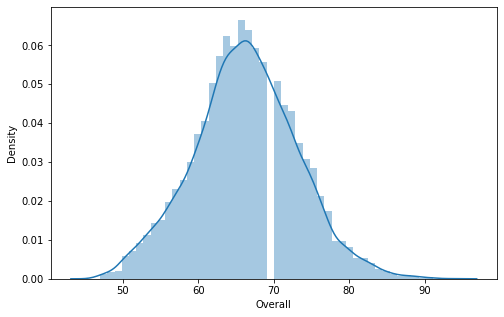

In [23]:
#1.	Plot the distribution of Overall rating for all players. 

plt.figure(figsize=(8,5))
sns.distplot(original_df["Overall"])
print("The skewness of the Overall_Rating",original_df["Overall"].skew())
plt.show()
# from the above graph  we can see that the data show the data is normally distributed
#before handling the missing or nan values in the rating


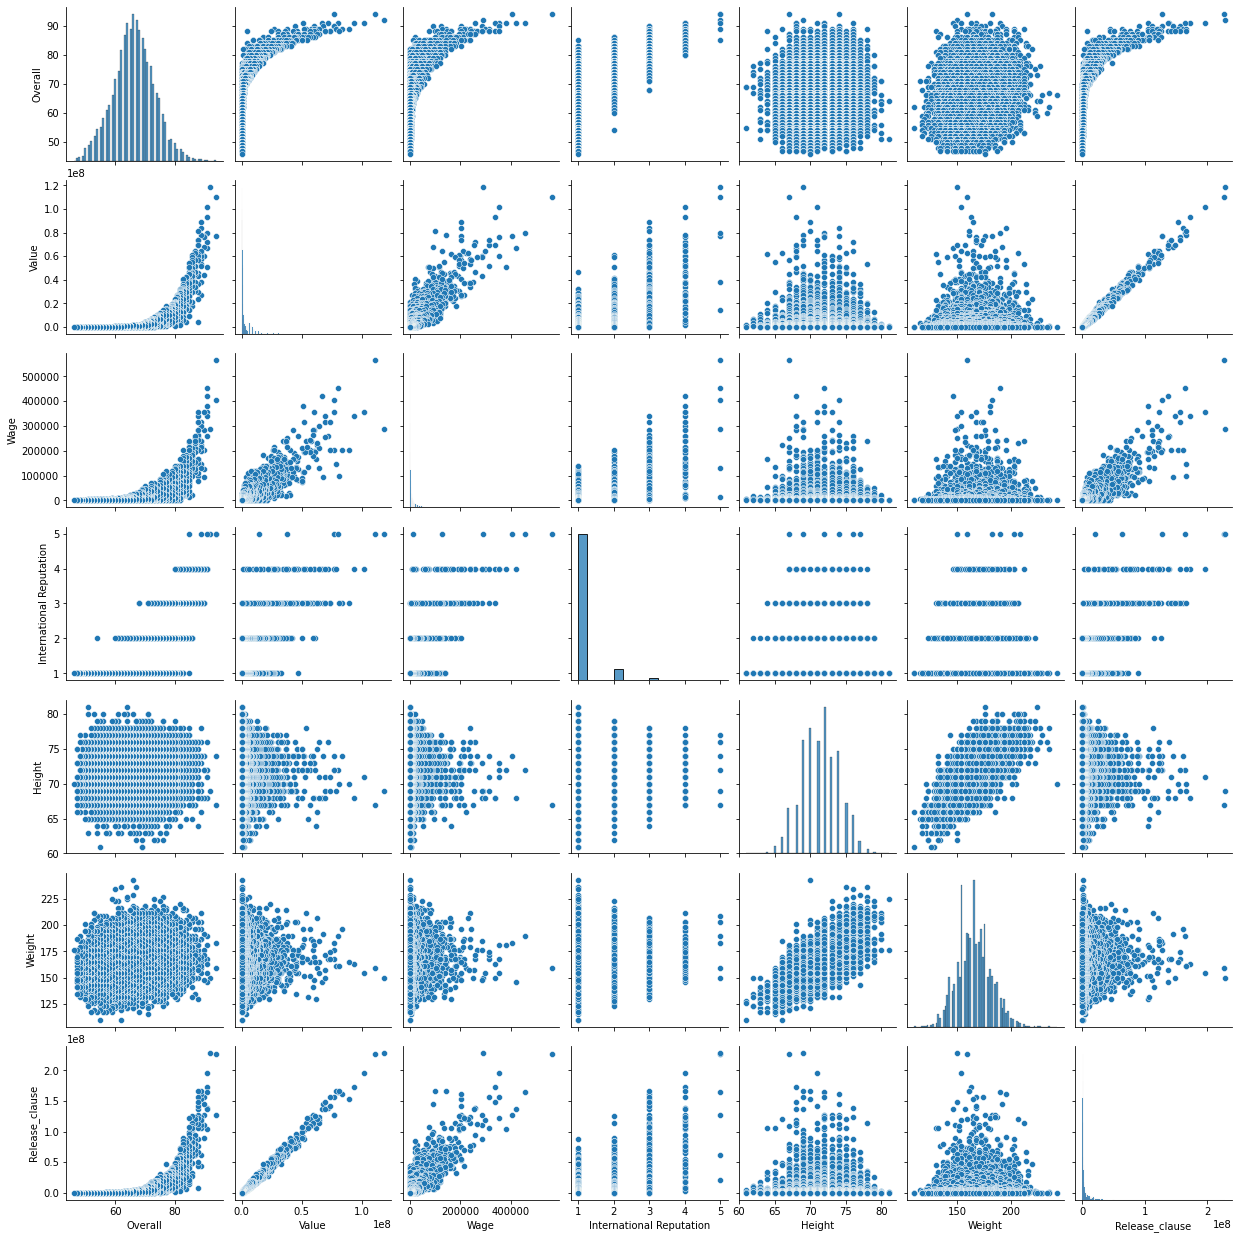

In [24]:
#Checking Relation between data columns
sns.pairplot(data=original_df,vars=["Overall","Value","Wage","International Reputation","Height","Weight","Release_clause"])
plt.show()

In [25]:
top20=original_df[(original_df.Overall>=60) &(original_df.Contract_Valid_Until==2020)].head(20)
 

In [26]:
print("The Average wage of the players is :",top20.Wage.mean())#Average Wage of the Players

The Average wage of the players is : 205150.0


In [27]:
print("The Average Age of the players is :",top20.Age.mean())

The Average Age of the players is : 29.95


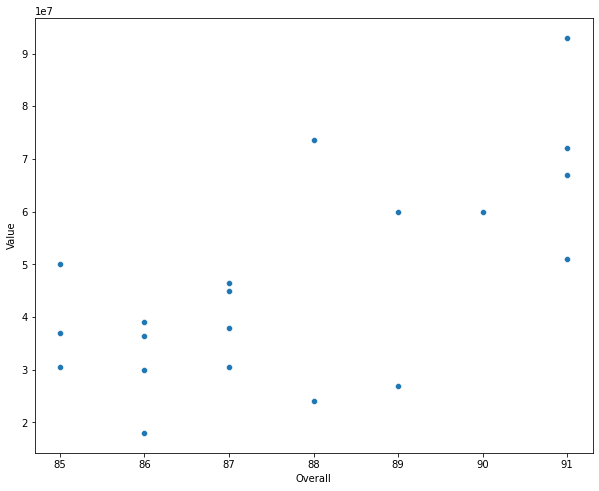

In [81]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=top20,x="Overall",y="Value")
plt.show()
#graph show the increase in Overall Rating show increase in the value


In [82]:
position=original_df["Position"].unique()

In [30]:
position


array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [31]:
def Data(x):
    original_df[original_df["Overall"]==x].sort_values(by="Overall",ascending=False).head(5)
    return x

In [32]:
DF_RF=Data("RF")
DF_ST=Data("ST")
DF_LW=Data("LW")
DF_GK=Data("GK")
DF_RCM=Data("RCM")
DF_LF=Data("LF")
DF_RS=Data("RS")
DF_RCB=Data("RCB")
DF_LCM=Data("LCM")
DF_CB=Data("CB")
DF_LDM=Data("LDM")
DF_CAM=Data("CAM")
DF_CDM=Data("CDM")
DF_LS=Data("LS")
DF_LCB=Data("LCB")
DF_RM=Data("RM")
DF_LAM=Data("LAM")
DF_LM=Data("LM")
DF_LB=Data("LB")
DF_RDM=Data("RDM")
DF_RW=Data("RW")
DF_CM=Data("CM")
DF_RB=Data("RB")
DF_RAM=Data("RAM")
DF_CF=Data("CF")
DF_RWB=Data("RWB")
DF_LWB=Data("LWB")

In [36]:
def name(x):
    x = original_df[original_df['Position'] == x].sort_values(by = 'Overall', ascending = False)['Name'].head(5)
    return x.values

In [55]:
names=[]
for i in position[:-1]:
    names.extend(name(i))

In [56]:
names=pd.Series(data=names)

In [57]:
names.value_counts()


M. Parolo          1
José Callejón      1
M. Ginter          1
Neymar Jr          1
L. Stindl          1
                  ..
L. Suárez          1
N. Schulz          1
Koke               1
W. Ben Yedder      1
Bruno Fernandes    1
Length: 135, dtype: int64

In [58]:
print("we can see that there is no players occuring twice or again in the data")

we can see that there is no players occuring twice or again in the data


In [65]:
def avg_wage(x):
    x=original_df[original_df["Position"]==x].sort_values(by="Overall",ascending=False).head(5)
    return round(x["Wage"].mean())

In [77]:
for i in position[:-1]:

    print("the avg wage",i,avg_wage(i))

the avg wage RF 148000
the avg wage ST 294000
the avg wage LW 261000
the avg wage GK 192800
the avg wage RCM 240800
the avg wage LF 121200
the avg wage RS 132200
the avg wage RCB 231000
the avg wage LCM 184400
the avg wage CB 139600
the avg wage LDM 126600
the avg wage CAM 174000
the avg wage CDM 217000
the avg wage LS 130200
the avg wage LCB 162000
the avg wage RM 131400
the avg wage LAM 81600
the avg wage LM 164600
the avg wage LB 177200
the avg wage RDM 105000
the avg wage RW 202000
the avg wage CM 130600
the avg wage RB 155400
the avg wage RAM 45400
the avg wage CF 47400
the avg wage RWB 44200
the avg wage LWB 34200


In [78]:
df_average_wage = pd.DataFrame({'Position' : position[:-1]})


In [79]:
df_average_wage["avg_wage"]=df_average_wage["Position"].apply(avg_wage)